In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Welcome to Data Analysis in Python
In this tutorial, We will see how to get started with Data Analysis in Python. 
The **Python Packages** that we use in this notebook are: 
- numpy 
- pandas 
- matplotlib
- seaborn

The **dataset** that we use in this notebook is **IPL (Indian Premier League) Dataset** posted on Kaggle Datasets.
IPL is one of the most popular cricket tournaments in the world, 
thus the problems we try to solve and the questions that we try to answer should be familiar to anyone who knows Cricket.

# Questions:
- How many matches we’ve got in the dataset?
- Which IPL Team is more successful?
- Which IPL Team is more successful in Eliminator?
- At most Times who is Player of the Match?
- Has Toss-winning helped in winning matches?

# Loading Libraries
Let us begin our analysis by loading the above mentioned Python Modules/Packages/Libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #visualization
import seaborn as sns #modern visualization
%matplotlib inline
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (14, 8)

In [3]:
matches = pd.read_csv("C:\\Users\\DELL\\Desktop\\Python Dec'21\\IPL Matches 2008-2020.csv")

In [4]:
matches.shape

(816, 17)

In [5]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [6]:
matches.tail()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
815,1237181,Dubai,2020-11-10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon


In [7]:
matches.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


In [8]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [9]:
matches.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [10]:
matches.drop(['method'],axis=1,inplace=True)

In [11]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan


## How many matches we've got in the dataset?

In [12]:
matches['id'].max()

1237181

## Most wins in ipl

In [13]:
counts = matches['winner'].value_counts()
counts.keys()

Index(['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Sunrisers Hyderabad', 'Deccan Chargers',
       'Delhi Capitals', 'Gujarat Lions', 'Pune Warriors',
       'Rising Pune Supergiant', 'Kochi Tuskers Kerala',
       'Rising Pune Supergiants'],
      dtype='object')

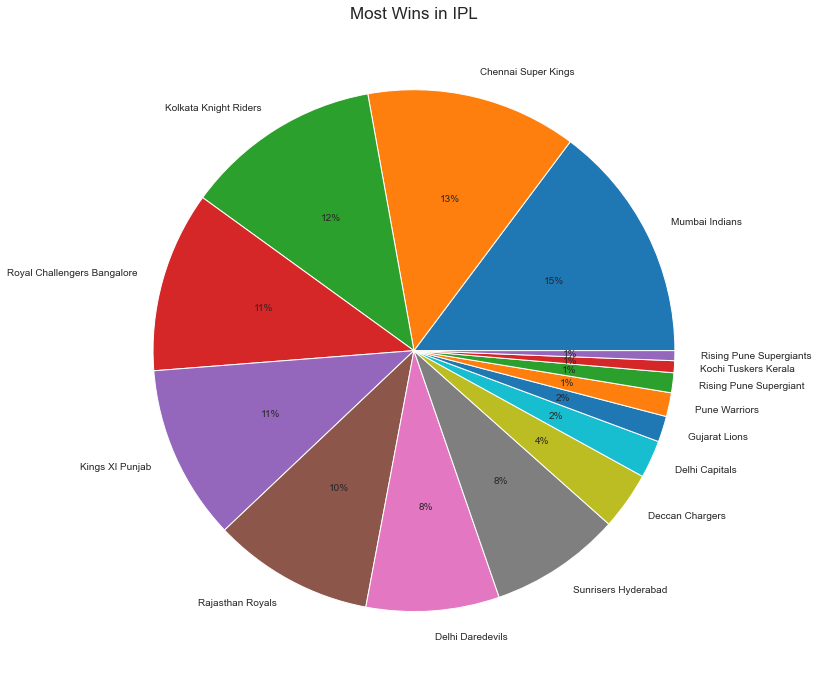

In [14]:
bar,ax = plt.subplots(figsize=(20,12))
ax = plt.pie(x = counts, labels = counts.keys(), autopct = '%.0f%%')
plt.title("Most Wins in IPL",fontsize=17)
plt.show()


## Most wins in eliminator

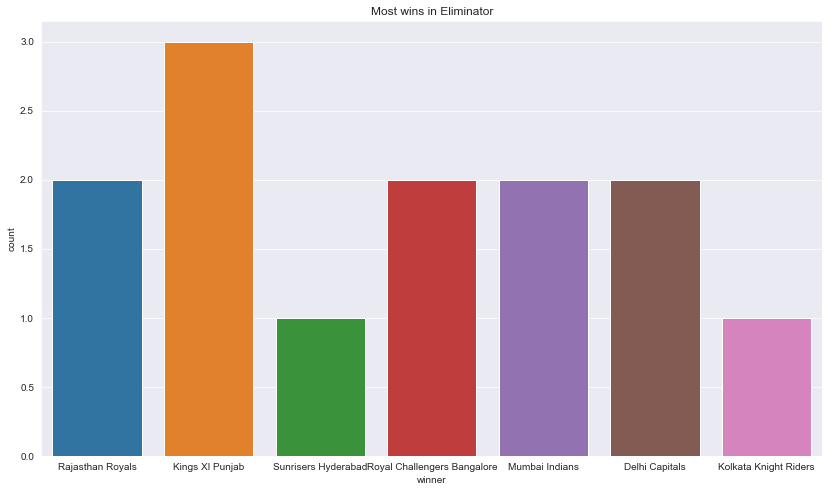

In [15]:
sns.countplot(x = matches['winner'][matches['eliminator'] == 'Y'], data = matches)
plt.title("Most wins in Eliminator")
plt.show()

## Player of the match

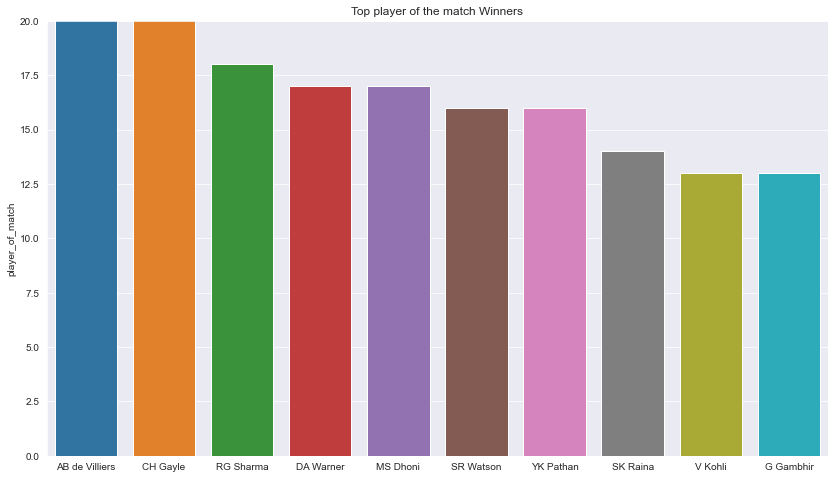

In [16]:
top_players = matches.player_of_match.value_counts()[:10]
#sns.barplot(x="day", y="total_bill", data=tips)
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
#top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v'); #palette="Blues");
plt.show()

## Toss Winner

In [17]:
teams = matches["toss_winner"].unique()
teams

array(['Royal Challengers Bangalore', 'Chennai Super Kings',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [18]:
teams = matches["toss_winner"].unique()
decision_making = pd.DataFrame([],columns=["Toss Winner","Decision","Times"])
for id,t in enumerate(teams):
    temp_bat = matches[(matches["toss_winner"] == t) & ((matches["toss_decision"] == "bat"))]
    temp_field = matches[(matches["toss_winner"] == t) & ((matches["toss_decision"] == "field"))]
    
    #Decision
    decision_making = decision_making.append({"Toss Winner":t,
    "Decision":"bat", "Times":temp_bat["toss_winner"].count()}, ignore_index = True)
    decision_making = decision_making.append({"Toss Winner":t,
    "Decision":"field", "Times":temp_bat["toss_winner"].count()}, ignore_index = True)

In [19]:
decision_making

,Toss Winner,Decision,Times
0,Royal Challengers Bangalore,bat,24
1,Royal Challengers Bangalore,field,24
2,Chennai Super Kings,bat,51
3,Chennai Super Kings,field,51
4,Rajasthan Royals,bat,34
5,Rajasthan Royals,field,34
6,Mumbai Indians,bat,48
7,Mumbai Indians,field,48
8,Deccan Chargers,bat,24
9,Deccan Chargers,field,24


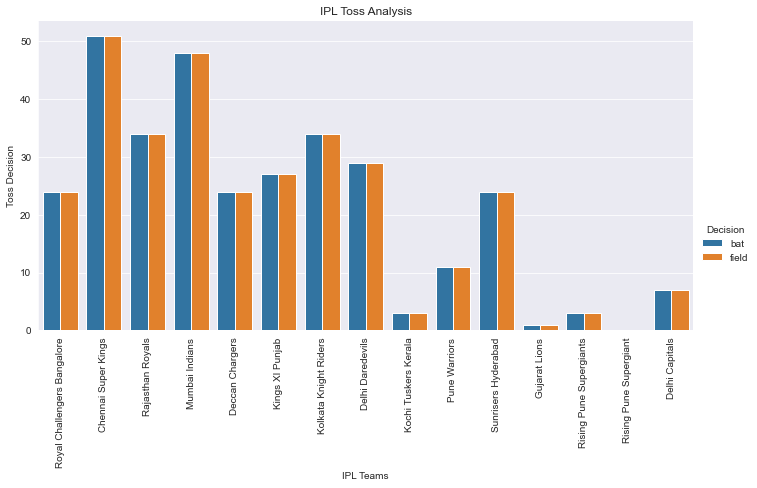

In [20]:
sns.catplot(x="Toss Winner",y="Times", hue="Decision", data=decision_making,
kind="bar",height=5,aspect=2)
plt.xticks(rotation=90)
plt.xlabel("IPL Teams")
plt.ylabel("Toss Decision")
plt.title("IPL Toss Analysis")
plt.show()